# Author : Ranvirsing Sisodiya
## Task 6 : Prediction using Decision Tree Algorithm
### Create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

In [2]:
#Reading the Data Set and Load the first five rows
data= pd.read_csv('C:/Users/Admin/Desktop/TSF/Task_6/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Load the last Five rows
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#checking Statistical description
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Checking for NaN  values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#checking unique classes in dataset
data.Species.nunique()
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
# Defining X and y from the Data
X = data.iloc[:,1:5].values  
y = data.iloc[:,-1].values

In [9]:
X.shape,y.shape

((150, 4), (150,))

In [10]:
# splitting dataset into training and testing data
X_train,X_test,y_train,y_test= train_test_split(X, y,test_size = 0.3,random_state=0)

# Decision Tree algorithm

In [11]:
clf= tree.DecisionTreeClassifier(criterion = "entropy", random_state=0)
clf.fit(X_train, y_train)
print("Model Trained")

Model Trained


In [12]:
y_pred=clf.predict(X_train)

# Checking adequacy of model

In [13]:
print("Train - Accuracy :", metrics.accuracy_score(y_train, y_pred))
print("\nTrain - Confusion matrix :\n",metrics.confusion_matrix(y_train, y_pred))
print("\nTrain - classification report :\n", metrics.classification_report(y_train, y_pred))

Train - Accuracy : 1.0

Train - Confusion matrix :
 [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]

Train - classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [14]:
print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("\nTest - Confusion matrix :\n",metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("\nTest - classification report :\n", metrics.classification_report(y_test, clf.predict(X_test)))

Test - Accuracy : 0.9777777777777777

Test - Confusion matrix :
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Test - classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Conclusion : Here we are getting f1-score more than 95% for each class. It means that our fitted model has more accuracy.

output


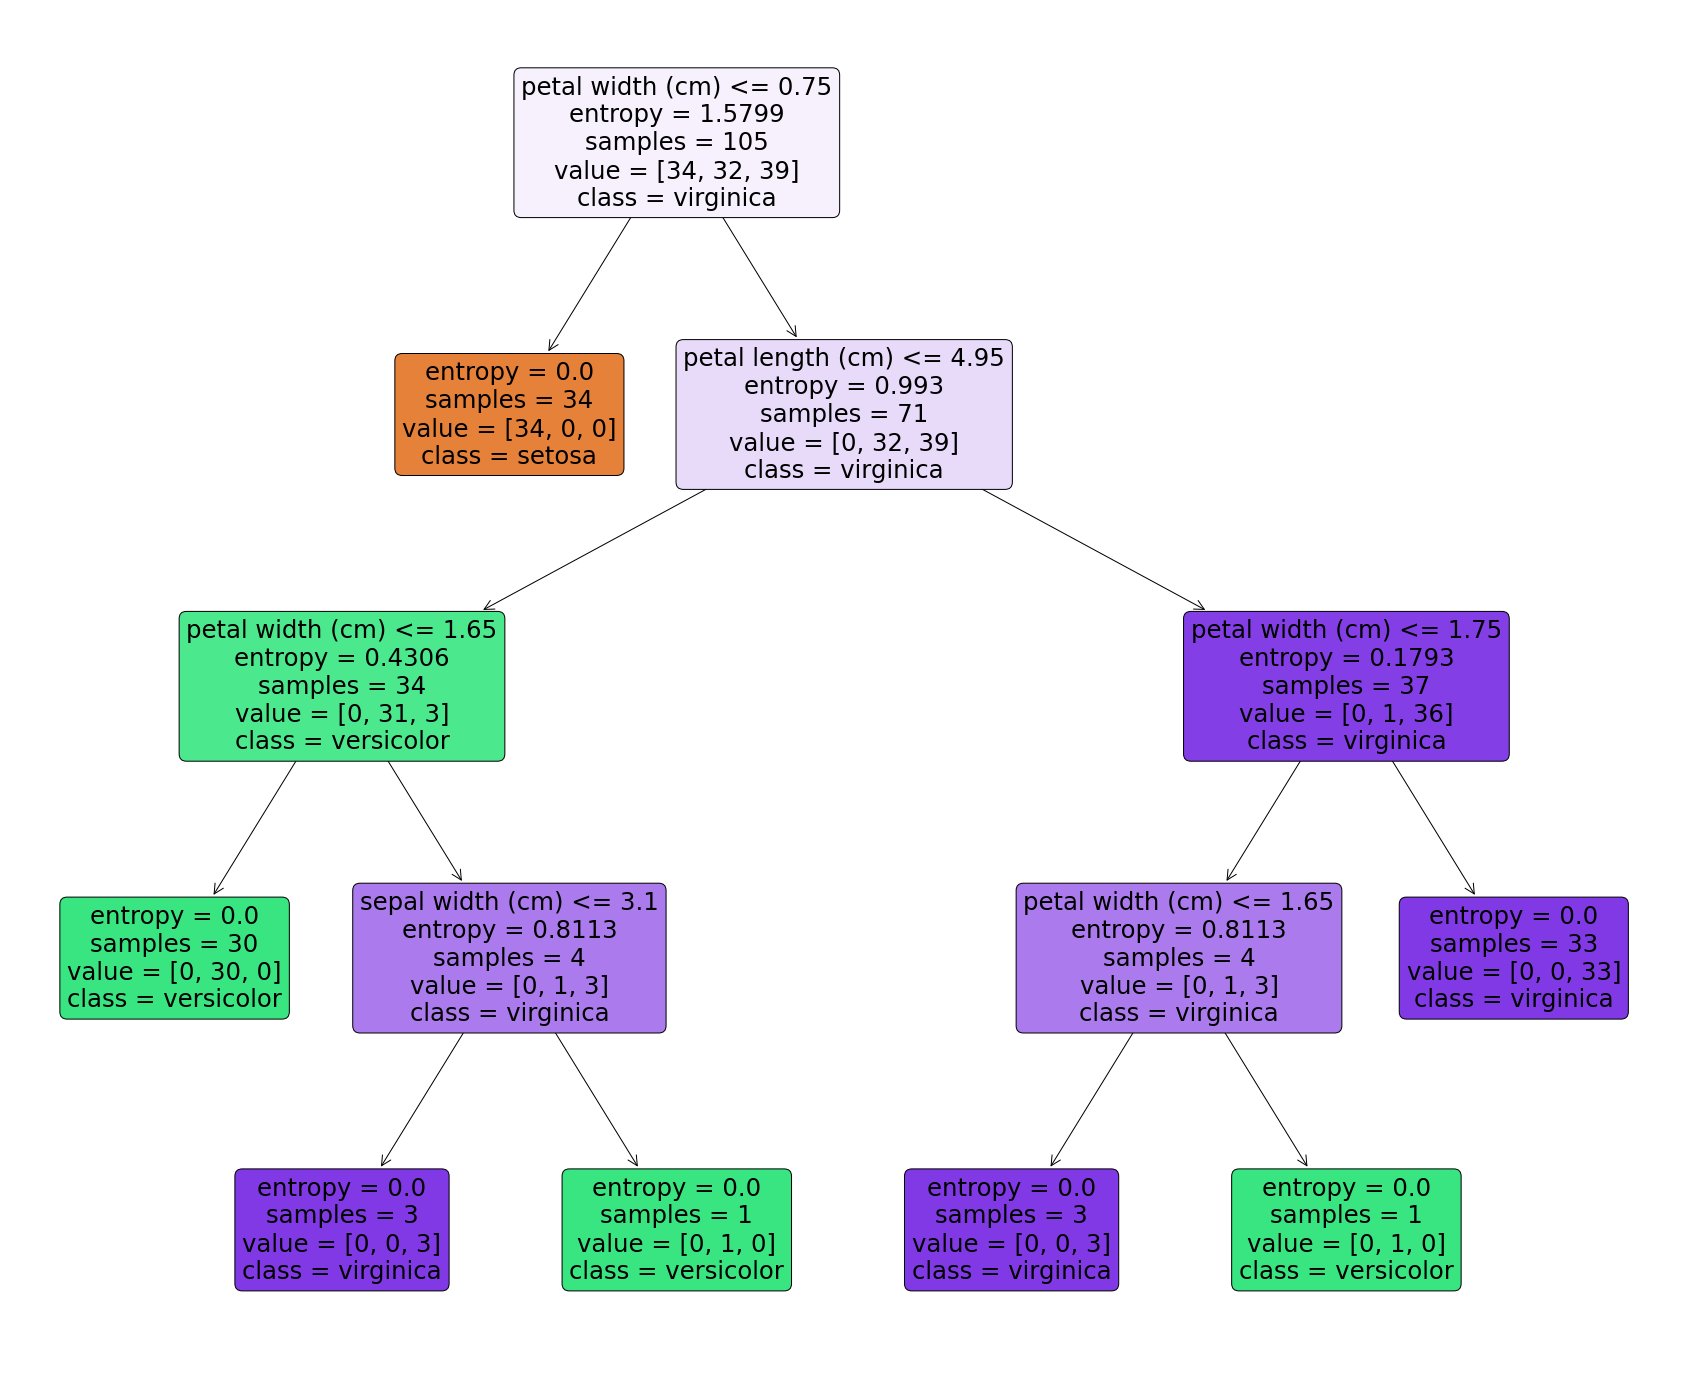

In [15]:
fnames = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cnames = ['setosa','versicolor','virginica']
fig = plt.figure(figsize = (30,25))

tree.plot_tree(clf,
feature_names=fnames,
class_names=cnames,
filled=True, rounded=True, precision =4
)
print('output')